<a href="https://colab.research.google.com/github/ButhainaJE/18f17989/blob/main/buildings_vs_forests_classification_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Defining the dataset paths below
train_dir = '/content/drive/MyDrive/buildings_forests/train'
test_dir = '/content/drive/MyDrive/buildings_forests/test'

In [ ]:
#
import os
print(len(os.listdir('/content/drive/MyDrive/buildings_forests/train/buildings')))
print(len(os.listdir('/content/drive/MyDrive/buildings_forests/train/forests')))
print(len(os.listdir('/content/drive/MyDrive/buildings_forests/test/buildings')))
print(len(os.listdir('/content/drive/MyDrive/buildings_forests/test/forests')))

437
474
47
50


In [ ]:
# Data preprocessing and augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary', # 'binary' for binary classification (cats vs. dogs)
    subset='training' # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation' # Specify 'validation' for the validation set
)


Found 730 images belonging to 2 classes.
Found 181 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [ ]:
# Model definition - CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) # feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 131s 6s/step - accuracy: 0.7570 - loss: 0.4870 - val_accuracy: 0.8785 - val_loss: 0.2774
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.9176 - loss: 0.2128 - val_accuracy: 0.8840 - val_loss: 0.2851
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 159s 6s/step - accuracy: 0.8988 - loss: 0.2412 - val_accuracy: 0.9227 - val_loss: 0.2118
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 133s 6s/step - accuracy: 0.9514 - loss: 0.1481 - val_accuracy: 0.8729 - val_loss: 0.3105
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step - accuracy: 0.9170 - loss: 0.2160 - val_accuracy: 0.9392 - val_loss: 0.2093
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 139s 6s/step - accuracy: 0.9655 - loss: 0.1081 - val_accuracy: 0.9227 - val_loss: 0.2391
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 130s 6s/step - accuracy: 0.9939 - loss: 0.0342 - val_accuracy: 0.9392 - val_loss: 0.2208
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 147s 6s/step - accuracy: 0.9928 - loss: 0.0196 - val_accuracy: 0.9392 - v

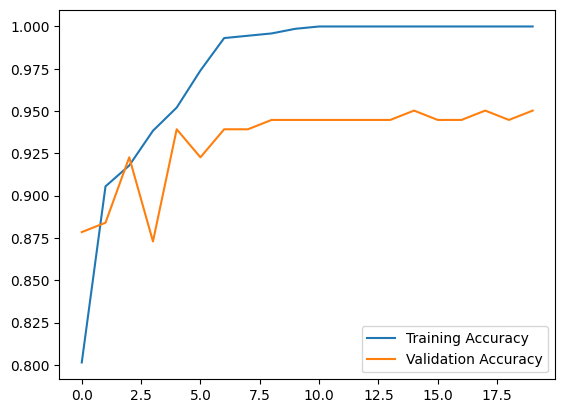

In [ ]:
# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

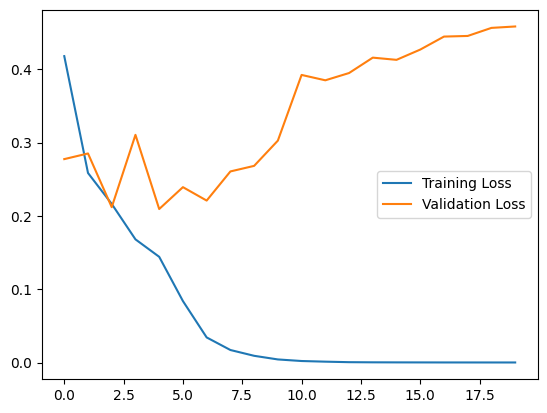

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Testing and evaluation
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 97 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)
from sklearn.metrics import confusion_matrix, classification_report

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[24 23]
 [23 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51        47
           1       0.54      0.54      0.54        50

    accuracy                           0.53        97
   macro avg       0.53      0.53      0.53        97
weighted avg       0.53      0.53      0.53        97



Using Pre-trained model - Resnet

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 272s 12s/step - accuracy: 0.5459 - loss: 3.4839 - val_accuracy: 0.4807 - val_loss: 1.3798
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 303s 11s/step - accuracy: 0.6775 - loss: 0.7283 - val_accuracy: 0.8674 - val_loss: 0.4098
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 267s 11s/step - accuracy: 0.8892 - loss: 0.3432 - val_accuracy: 0.8508 - val_loss: 0.3821
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 254s 11s/step - accuracy: 0.8905 - loss: 0.3027 - val_accuracy: 0.8674 - val_loss: 0.3352
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 249s 11s/step - accuracy: 0.9196 - loss: 0.2467 - val_accuracy: 0.8398 - val_loss: 0.3572
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 249s 11s/step - accuracy: 0.9017 - loss: 0.2398 - val_accuracy: 0.8564 - val_loss: 0.3185
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 254s 11s/step - accuracy: 0.9265 - loss: 0.2175 - val_accuracy: 0.8840 - val_loss: 0.3048
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 249s 11s/step - accuracy: 0.9232 - loss: 0.2053 - val_accuracy: 0.

In [ ]:
predictions = resnet_model.predict(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 33s 7s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[26 21]
 [23 27]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.53      0.55      0.54        47
           1       0.56      0.54      0.55        50

    accuracy                           0.55        97
   macro avg       0.55      0.55      0.55        97
weighted avg       0.55      0.55      0.55        97

